   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


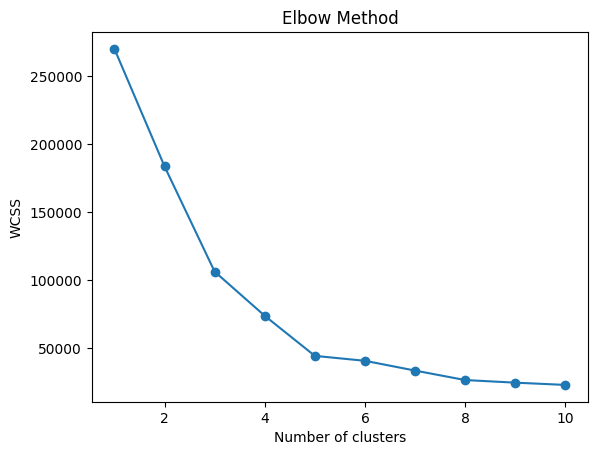

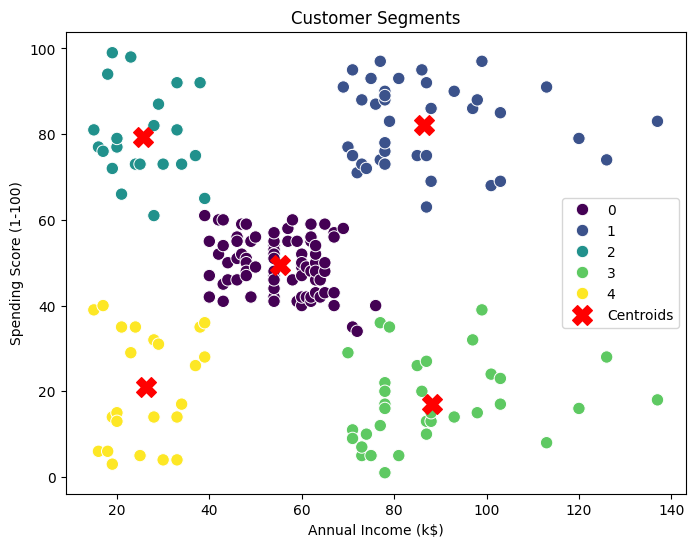

         CustomerID        Age  Annual Income (k$)  Spending Score (1-100)  \
Cluster                                                                      
0         86.320988  42.716049           55.296296               49.518519   
1        162.000000  32.692308           86.538462               82.128205   
2         23.090909  25.272727           25.727273               79.363636   
3        164.371429  41.114286           88.200000               17.114286   
4         23.000000  45.217391           26.304348               20.913043   

         Cluster  
Cluster           
0            0.0  
1            1.0  
2            2.0  
3            3.0  
4            4.0  


In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# ------------------------------
# Step 1: Load the dataset
# ------------------------------
# Sample dataset (you can use Mall_Customers.csv from Kaggle)
data = pd.read_csv("/content/Mall_Customers.csv")

# Display first few rows
print(data.head())

# ------------------------------
# Step 2: Select important features
# ------------------------------
# We’ll use 'Annual Income' and 'Spending Score'
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# ------------------------------
# Step 3: Find optimal number of clusters (Elbow Method)
# ------------------------------
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the Elbow graph
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# ------------------------------
# Step 4: Apply K-Means with optimal clusters (say 5)
# ------------------------------
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Add cluster column to dataset
data['Cluster'] = y_kmeans

# ------------------------------
# Step 5: Visualize the clusters
# ------------------------------
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=y_kmeans, palette='viridis', s=80)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='red', label='Centroids', marker='X')
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# ------------------------------
# Step 6: View clustered data
# ------------------------------
# Step 6: View clustered data (numeric columns only)
numeric_cols = data.select_dtypes(include=['number']).columns
print(data.groupby('Cluster')[numeric_cols].mean())
